In [31]:
#Importing libraries
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Loading the data
df = pd.read_csv("/Users/shivanshthakur/Downloads/archive/Bangalore_Restaurants.csv")

In [3]:
#Understanding the data
print(df.shape)
print(df.columns)



(5109, 13)
Index(['Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Website', 'Address', 'Phone_No', 'Latitude',
       'Longitude'],
      dtype='object')


In [4]:
df.head()

Restaurant_Name                                           Category  \
0           Burma Burma  Asian, Burmese, Bubble Tea, Salad, Tea, Desser...   
1  Windmills Craftworks  Continental, Fast Food, Kebab, Beverages, Ital...   
2        CTR Shri Sagar                                       South Indian   
3  Brahmin's Coffee Bar                                       South Indian   
4      Milano Ice Cream                     Desserts, Ice Cream, Beverages   

   Pricing_for_2                          Locality  Dining_Rating  \
0           1500            Indiranagar, Bangalore            4.9   
1           2500   Windmills Craftworks, Bangalore            4.9   
2            150           Malleshwaram, Bangalore            4.9   
3            100           Basavanagudi, Bangalore            4.9   
4            400            Indiranagar, Bangalore            4.9   

   Dining_Review_Count  Delivery_Rating  Delivery_Rating_Count  \
0               2790.0              4.5                  838.0   
1               6543.0              4.2                  524.0   
2               4837.0              4.3                22100.0   
3               2975.0              4.4                  372.0   
4               2575.0              4.4                 1180.0   

                                             Website  \
0  https://www.zomato.com/bangalore/burma-burma-i...   
1  https://www.zomato.com/bangalore/windmills-cra...   
2  https://www.zomato.com/bangalore/ctr-shri-saga...   
3  https://www.zomato.com/bangalore/brahmins-coff...   
4  https://www.zomato.com/bangalore/milano-ice-cr...   

                                             Address     Phone_No   Latitude  \
0  607, Ground Floor, 12th Main, Hal 2nd Stage, I...  9.18043E+11  12.970394   
1  78, Immaine Epip Industrial Area, Whitefield B...   9.1888E+11  12.982413   
2   7th Cross, Margosa Road, Malleshwaram, Bangalore  9.18023E+11  12.998270   
3       Ranga Rao Road, Near Basavanagudi, Bangalore  9.19845E+11  12.954043   
4  460, 2nd Cross, Krishna Temple Road, Indiranag...  9.18041E+11  12.979121   

   Longitude  
0  77.644713  
1  77.721979  
2  77.569455  
3  77.568865  
4  77.644039

In [5]:
df.dtypes

Restaurant_Name           object
Category                  object
Pricing_for_2              int64
Locality                  object
Dining_Rating            float64
Dining_Review_Count      float64
Delivery_Rating          float64
Delivery_Rating_Count    float64
Website                   object
Address                   object
Phone_No                  object
Latitude                 float64
Longitude                float64
dtype: object

In [6]:
#column for dine in score
df['Dine in Score'] = df['Dining_Rating'] * df['Dining_Review_Count']

In [8]:
#column for delivery score
df['Delivery in Score'] = df['Delivery_Rating'] * df['Delivery_Rating_Count']

In [9]:
#Checking null values in columns
null_check = df.isnull().sum().reset_index()
null_check.columns=['Columns','Number of Nulls']
null_check['% Of Nulls']=((null_check['Number of Nulls']/len(df))*100).round(2)
null_check

Columns  Number of Nulls  % Of Nulls
0         Restaurant_Name                0        0.00
1                Category                0        0.00
2           Pricing_for_2                0        0.00
3                Locality                0        0.00
4           Dining_Rating                8        0.16
5     Dining_Review_Count                8        0.16
6         Delivery_Rating             1412       27.64
7   Delivery_Rating_Count                8        0.16
8                 Website                0        0.00
9                 Address                0        0.00
10               Phone_No                0        0.00
11               Latitude                0        0.00
12              Longitude                0        0.00
13          Dine in Score                8        0.16
14      Delivery in Score             1414       27.68

[Text(0.5, 1.0, 'Distribution of null values in the data')]

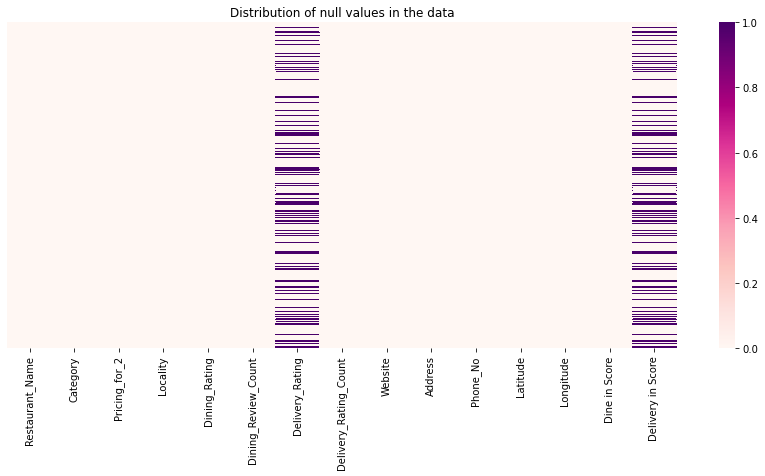

In [10]:
#Heatmap of null values
plt.figure(figsize=(15,6))
g1=sns.heatmap(data=df.isnull(),yticklabels=False,cmap='RdPu')
g1.set(title="Distribution of null values in the data")

# Spacial Analysis

In [11]:
#Plotting the positions of all the restaurant on the map of banglore
bmap = folium.Map(location = [12.9716, 77.5946], zoom_start=11)

In [12]:
for i in range(0,len(df)):
   folium.CircleMarker(
      location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: blue">{df.iloc[i]['Restaurant_Name']}</div>""")
   ).add_to(bmap)

In [13]:
bmap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x432 with 0 Axes>

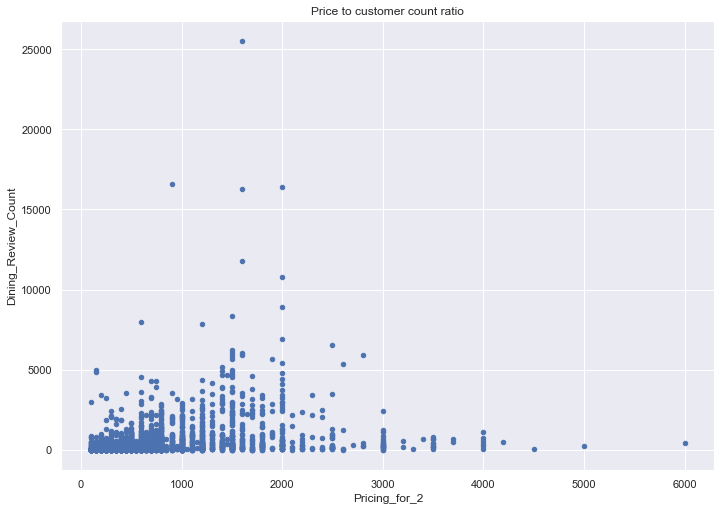

<Figure size 1080x432 with 0 Axes>

In [26]:
#Reviewing relation between Price and customer count for dine in.
sns.set(rc={'figure.figsize':(11.7,8.27)})
scatter = df.plot(kind = 'scatter', y  = 'Dining_Review_Count', x = 'Pricing_for_2',)
scatter.set(title="Price to customer count ratio")
plt.figure(figsize=(15,6))

In [27]:
Top_rated_dineIn = pd.DataFrame(df.groupby(['Restaurant_Name']).sum()["Dine in Score"]).sort_values(by="Dine in Score",ascending=False)

[Text(0.5, 1.0, 'Top 10 Popular restaurants in Banglore')]

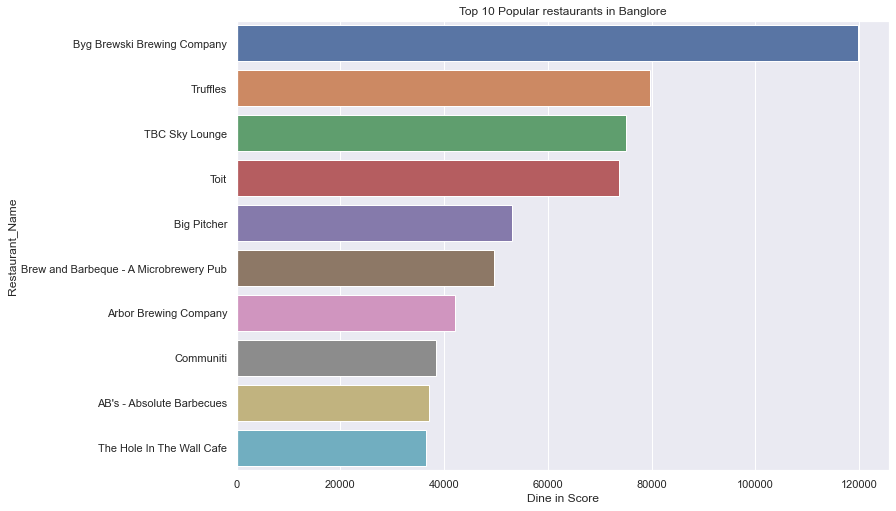

In [29]:
#Most popular dine in restaurant in banglore
g2 = sns.barplot(data=(Top_rated_dineIn[0:10]).reset_index(),x="Dine in Score",y='Restaurant_Name')
g2.set(title="Top 10 Popular restaurants in Banglore")

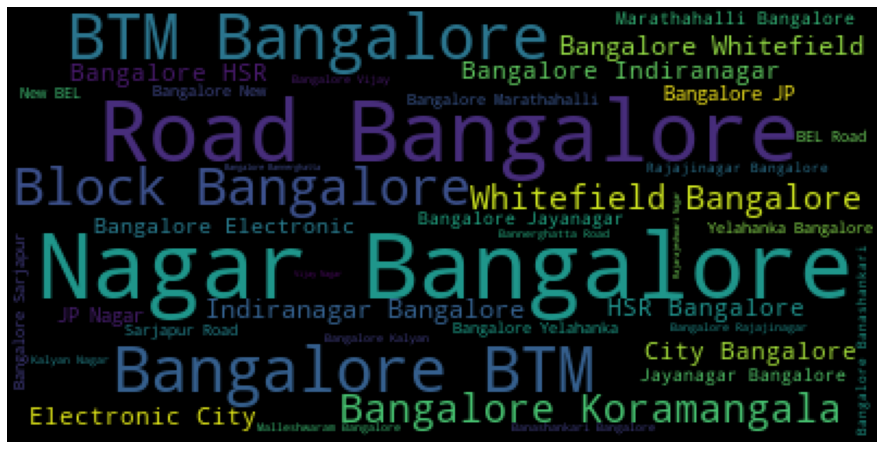

In [34]:
#Wordcloud for localities with most restaurants
plt.figure(figsize=(20,8))
df['Locality'] = df['Locality'].astype(str)
text = ' '.join(df['Locality'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 1080x432 with 0 Axes>

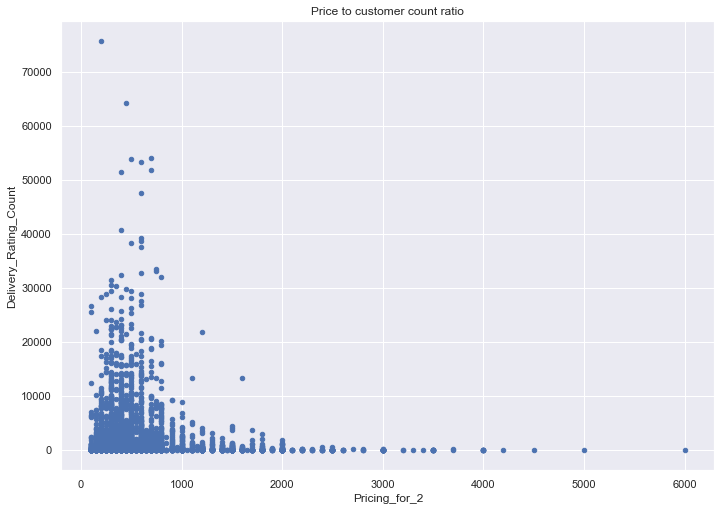

<Figure size 1080x432 with 0 Axes>

In [36]:
#Reviewing relation between Price and customer count for delivery.
sns.set(rc={'figure.figsize':(11.7,8.27)})
g4 = df.plot(kind = 'scatter', y  = 'Delivery_Rating_Count', x = 'Pricing_for_2',)
g4.set(title="Price to customer count ratio")
plt.figure(figsize=(15,6))

In [37]:
Top_rated_delivery = pd.DataFrame(df.groupby(['Restaurant_Name']).sum()["Delivery in Score"]).sort_values(by="Delivery in Score",ascending=False)

[Text(0.5, 1.0, 'Top 10 Popular restaurants in Banglore')]

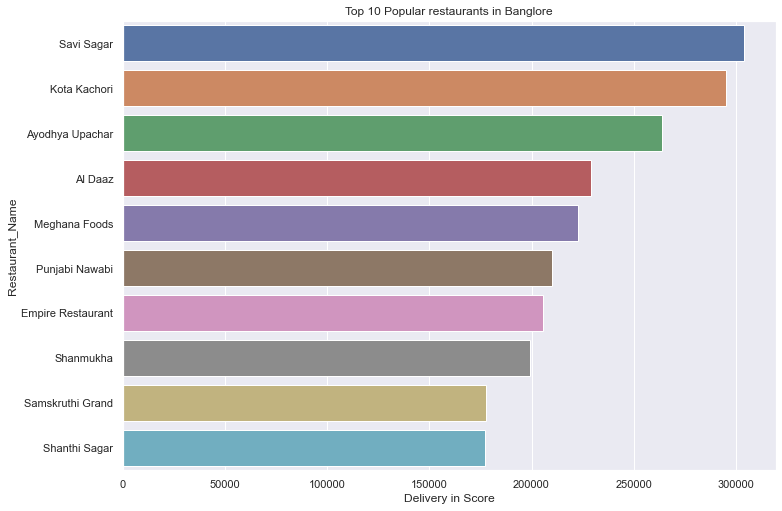

In [40]:
#Most popular delivery restaurant in banglore
g5 = sns.barplot(data=(Top_rated_delivery[0:10]).reset_index(),x="Delivery in Score",y='Restaurant_Name')
g5.set(title="Top 10 Popular restaurants in Banglore")